# Tutorial for R-tipping in the modified tent map
In this tutorial, we reproduce the figures for the first example of the paper. Moreover, most of the functions in map_functions are designed to be applied to other maps.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from map_functions import *

# Visualisations

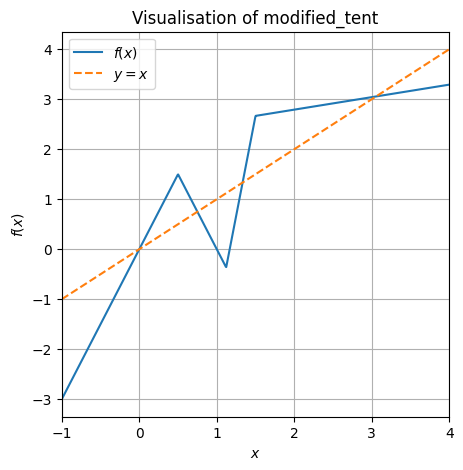

In [2]:
d=0
visualise_fx(func= modified_tent, plot_ggx=False, u = 3, d = d, x_min=-1+d, x_max=4+d)

Visualisation of a tracking trajectory, a tipping trajectory and a trajectory near the edge state. Note that find_critical_rate only finds one critical rate. 

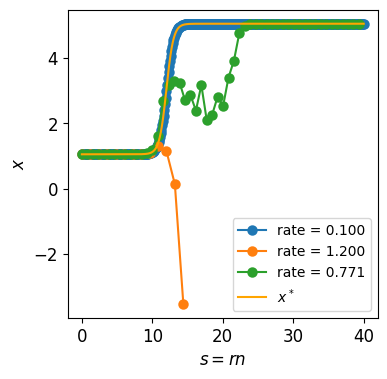

In [3]:
# Only d drifting, tanh drifting function as defined by Kiers
rate1, rate2 = 0.1, 1.2
range_limit = 20
slope = 2
s_ini = -12
_, attractor = modified_tent_intersections(u=3, d = 0)

rc = find_critical_rate(func=modified_tent, evolving_funcs=[tanh_change], evolving_params=['d'], xmin_escape = -slope,
                        rate_low_bound=rate1, rate_high_bound=rate2, iterations=10, u=3, slope = slope, s_ini = s_ini, 
                        fixed_pt_func = find_one_fixed_point_default, fixed_pt_x0 = 100, 
                        converging_condition = converging_condition_pullback, x_thres = attractor)

plot_tipping(rates = [rate1, rate2, rc], func=modified_tent, evolving_funcs=[tanh_change], evolving_params=['d'], xmin_escape = -slope, u=3,  
             slope = slope, s_ini = s_ini, evolving_range=40, fixed_pt_x0 = 100)

Visualisation of the parameter drift in the parameter space.

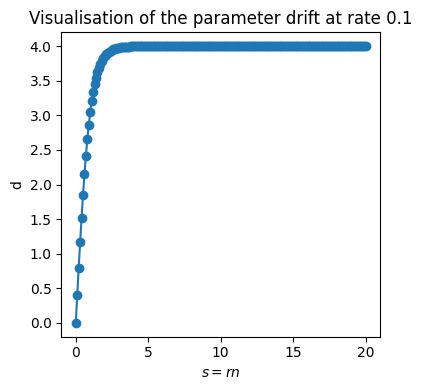

In [4]:
# d vs. s (time)
s_ini = 0
plot_parameter_drift(evolving_func=tanh_change, evolving_param='d', rate = 0.1, s_ini = s_ini)

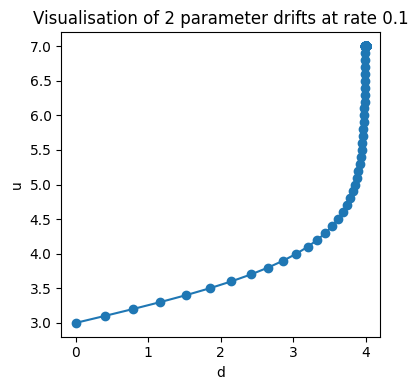

In [5]:
# u versus d
plot_parameter_drift_2D(evolving_funcs=[tanh_change, linear_change_finite], evolving_params=['d', 'u'],
                        rate = 0.1, s0 = 3, cap = 7)

# Fractal 1

In other words, the fractal basin boundaries in the phase space

## Visualisation

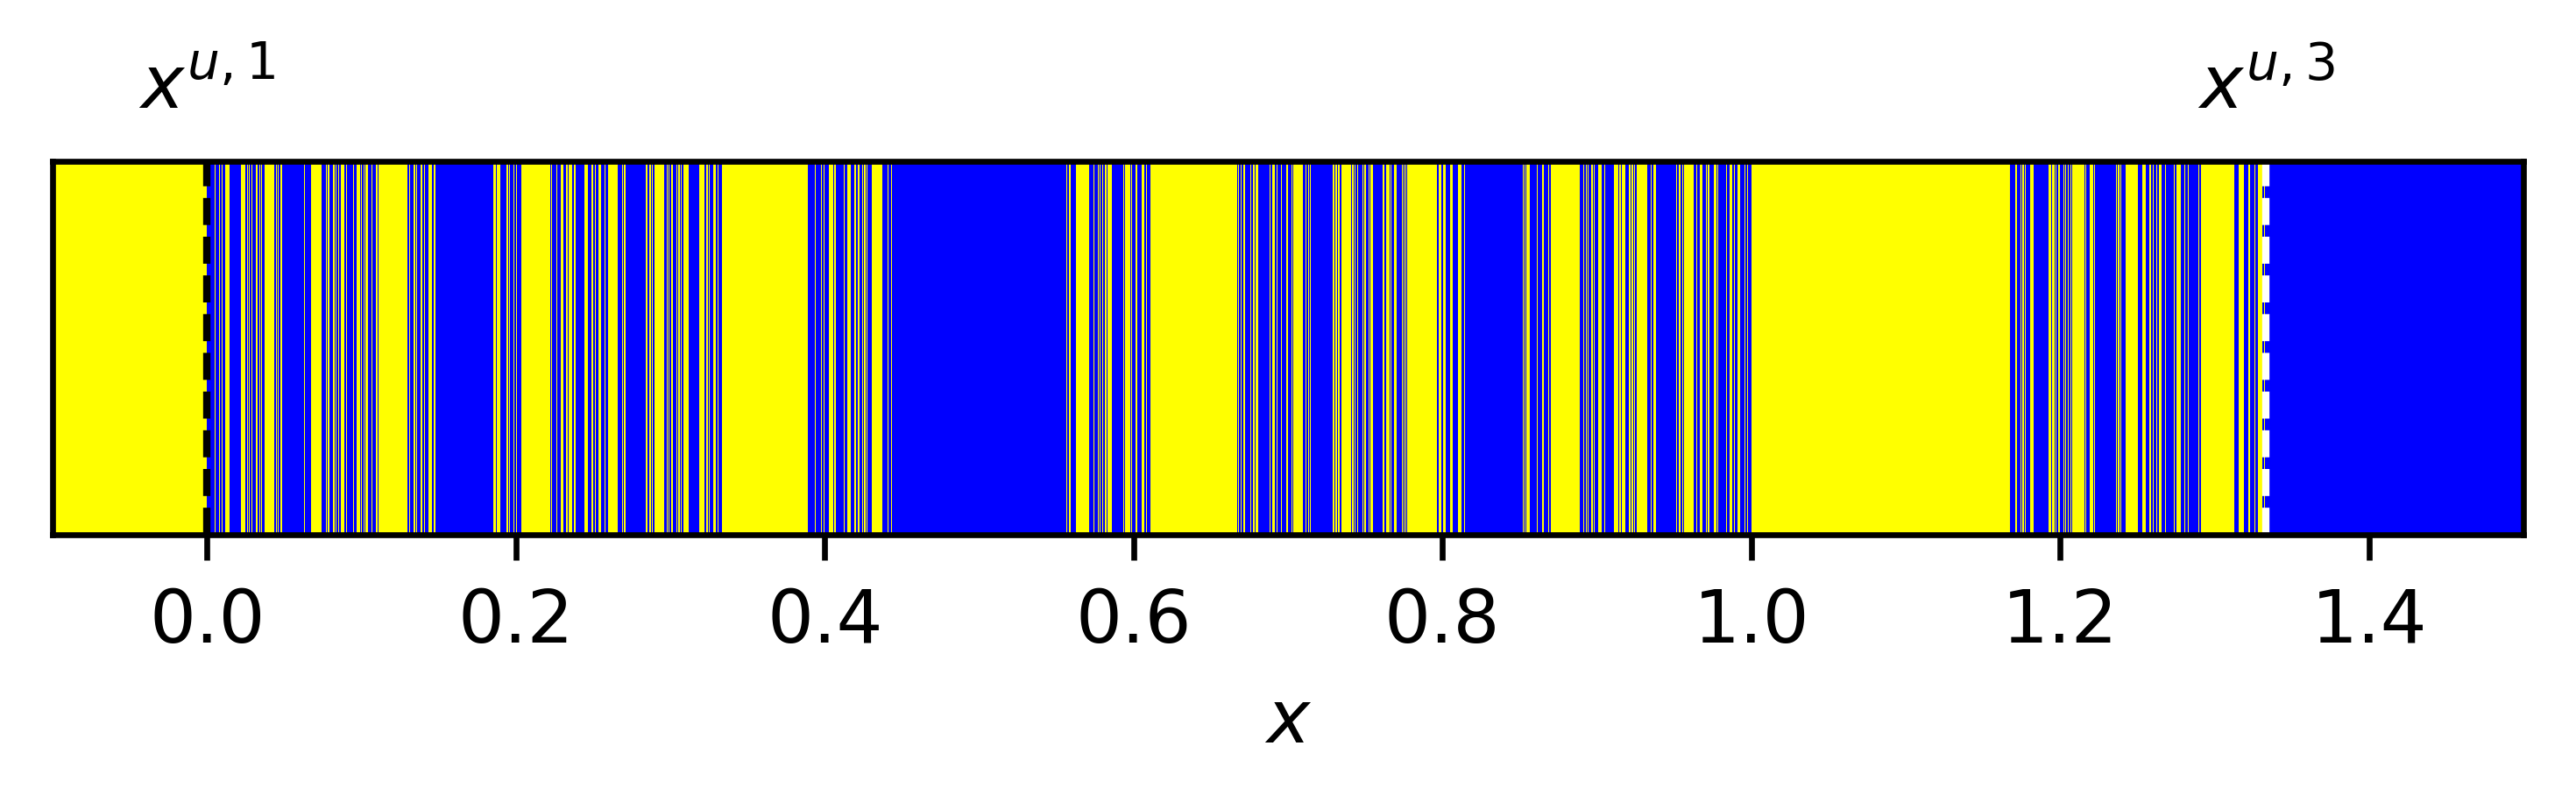

In [6]:
d=0
right_reinject, _ = modified_tent_intersections(u=3, d=d)
visualise_first_fractal_parallel(func = modified_tent, u = 3, d = d, npts = 10000, xmin_escape = d, mark_symbol=True)

## Computing the fractal dimension
First verify with the standard tent map, its dimension has been analytically derived to be $\frac{\ln(2)}{\ln(u)}$.

In [7]:
alpha = uncertainty_algorithm_parallel(threshold=100, func = tent, u = 3, plot = False, xmin_escape = 0, max_steps = 100, attractors = None, n_jobs=-1)
print('The dimension of the Cantor set of the tent map is {:.3f}'.format(1-alpha))  # should be ln(2)/ln(u)

Running uncertainty_algorithm_in parallel (n_jobs=-1, prefer=processes)...
The dimension of the Cantor set of the tent map is 0.629


Now compute the dimension of the modified tent map.

Running uncertainty_algorithm_in parallel (n_jobs=-1, prefer=processes)...


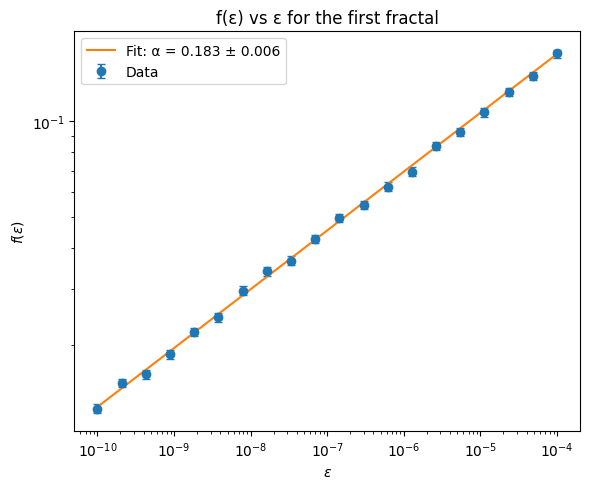

0.8165660299107225


In [8]:
u=3
d=0
_, attractor = modified_tent_intersections(u = u, d = d)
dim = 1-uncertainty_algorithm_parallel(threshold=1000, func = modified_tent, u=u, d=d, plot = True, xmin_escape = 0, max_steps = 100, attractors = [attractor], base_seed=0)
print(dim)

# Fractal 2
In other words, the fractal of the parameter change $\Delta \lambda = \lambda_{f} - \lambda_i$ when the rate is infinite (i.e. the step function).

## Visualisation

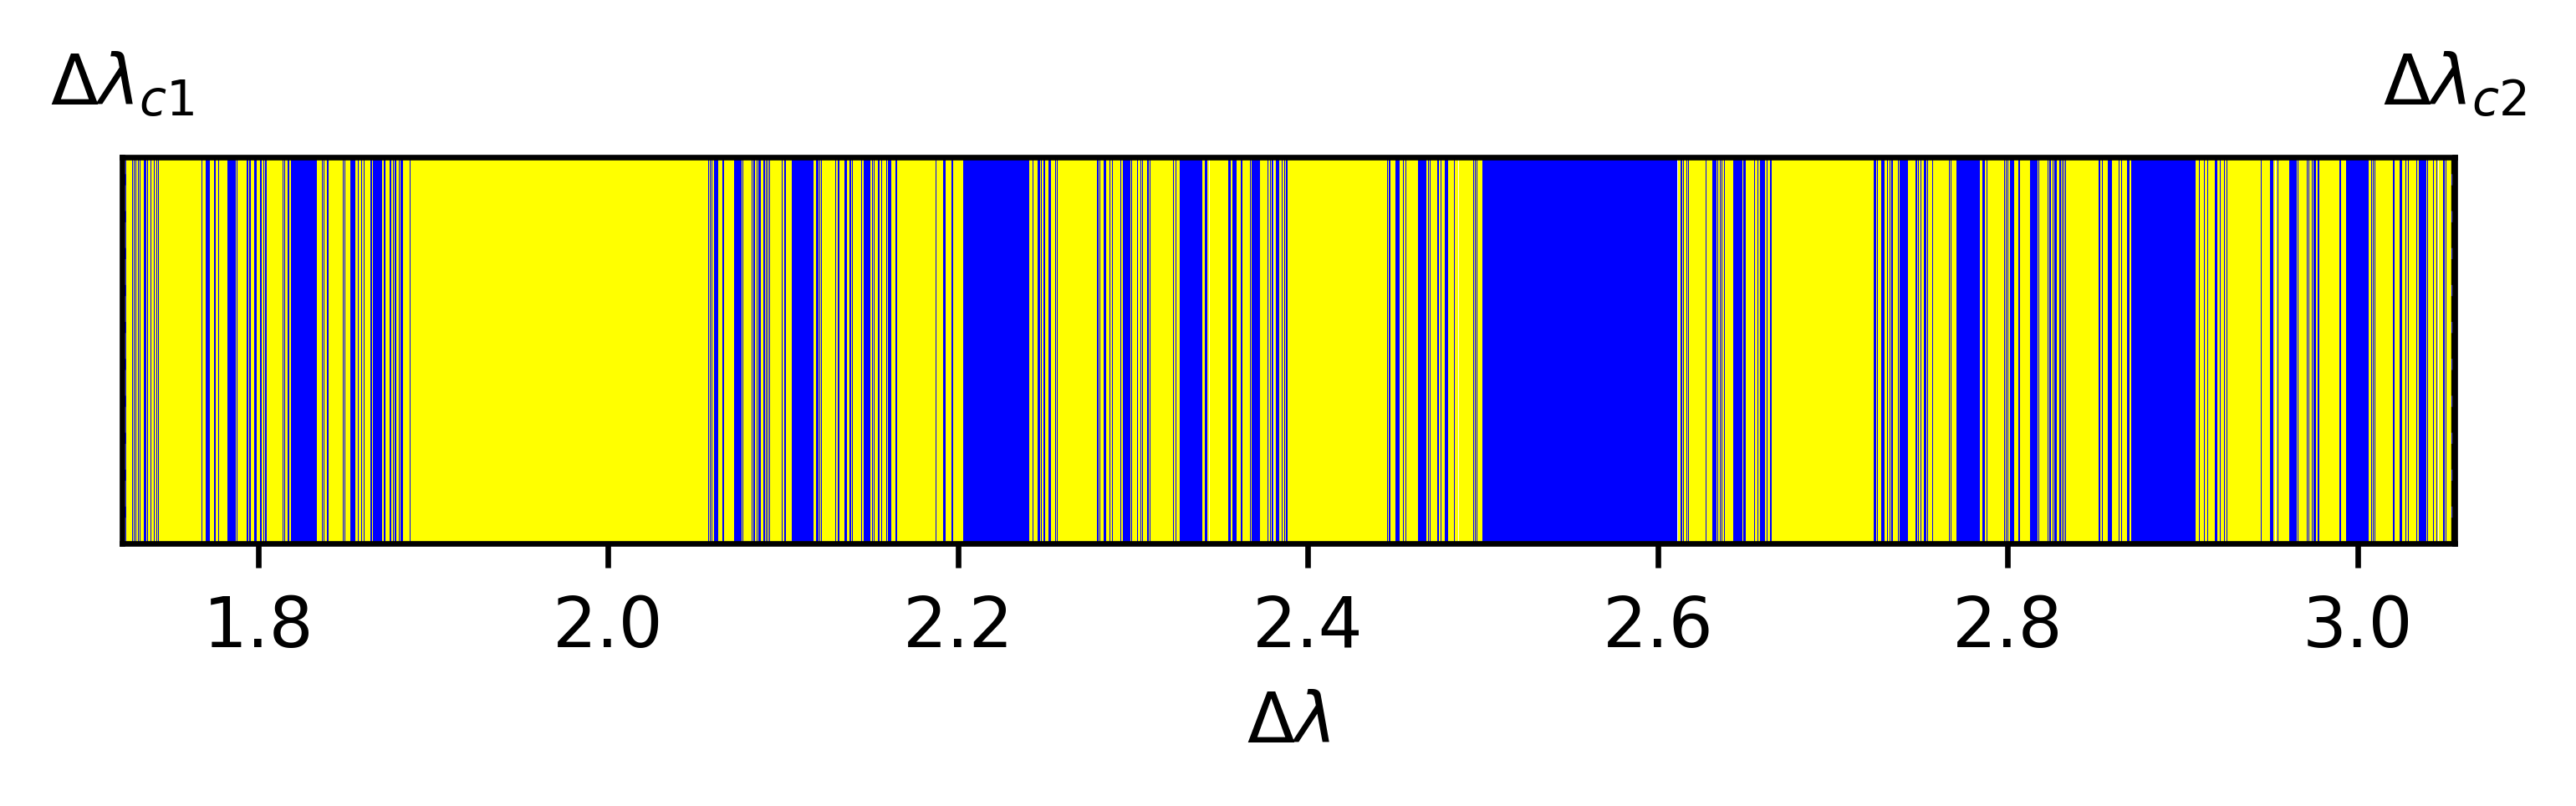

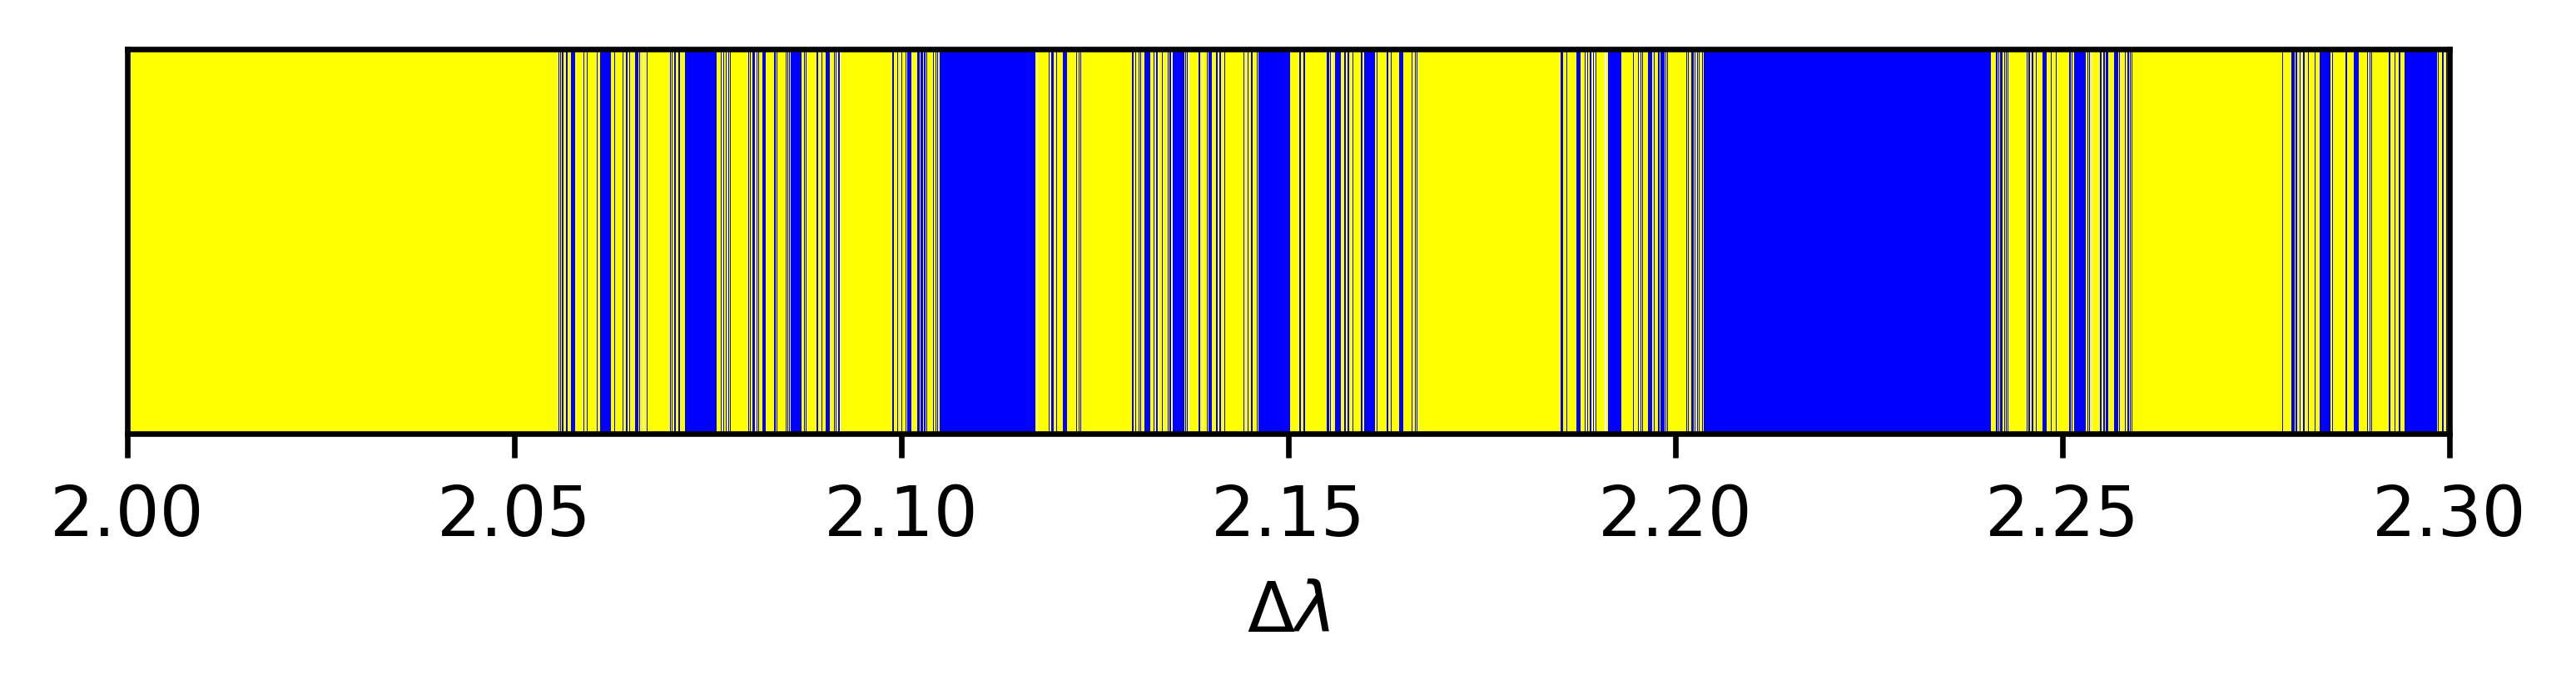

In [9]:
right_reinject, attractor = modified_tent_intersections(u=3, d=0)
d_low, d_high = attractor - right_reinject, attractor
visualise_second_fractal_parallel(func = modified_tent, u=3, d_low=d_low, d_high = d_high, npts = 10000, 
                                  evolving_params = ['d'], xmin_escape = 0, mark_symbol= True)
visualise_second_fractal_parallel(func = modified_tent, u=3, d_low=2, d_high=2.3, npts = 10000, 
                                  evolving_params = ['d'], xmin_escape = 0, mark_symbol= False)

## Computing the fractal dimension

Running uncertainty_algorithm_for_delta_d in parallel (n_jobs=-1, prefer=processes)...


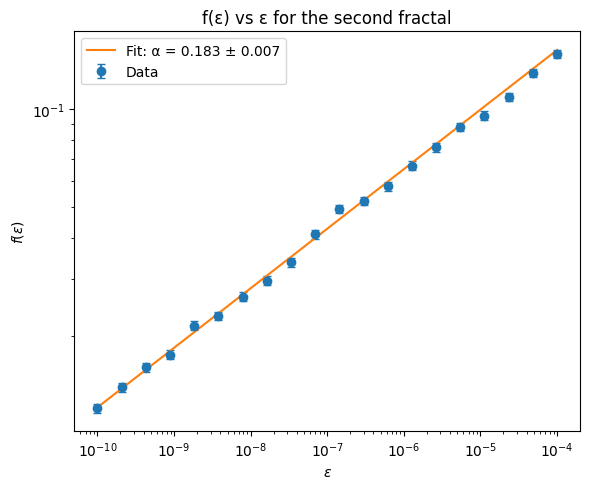

The dimension of fractal 2 is 0.817


In [10]:
right_reinject, attractor = modified_tent_intersections(u=3, d=0)
dmin, dmax = attractor - right_reinject, attractor

dim = 1-uncertainty_algorithm_for_delta_d_parallel(func=modified_tent, u = 3, threshold = 1000, min_eps=1e-10, max_eps=1e-4, base_seed=0, n_jobs=-1,
                                                fit_truncation_order = -6, plot = True, dmin=dmin, dmax=dmax, evolving_params = ['d'], xmin_escape = 0)

print(f'The dimension of fractal 2 is {dim:.3f}')

# Fractal 3
In other words, the fractal in the parameter space of rate ($r$).

## Visualisation

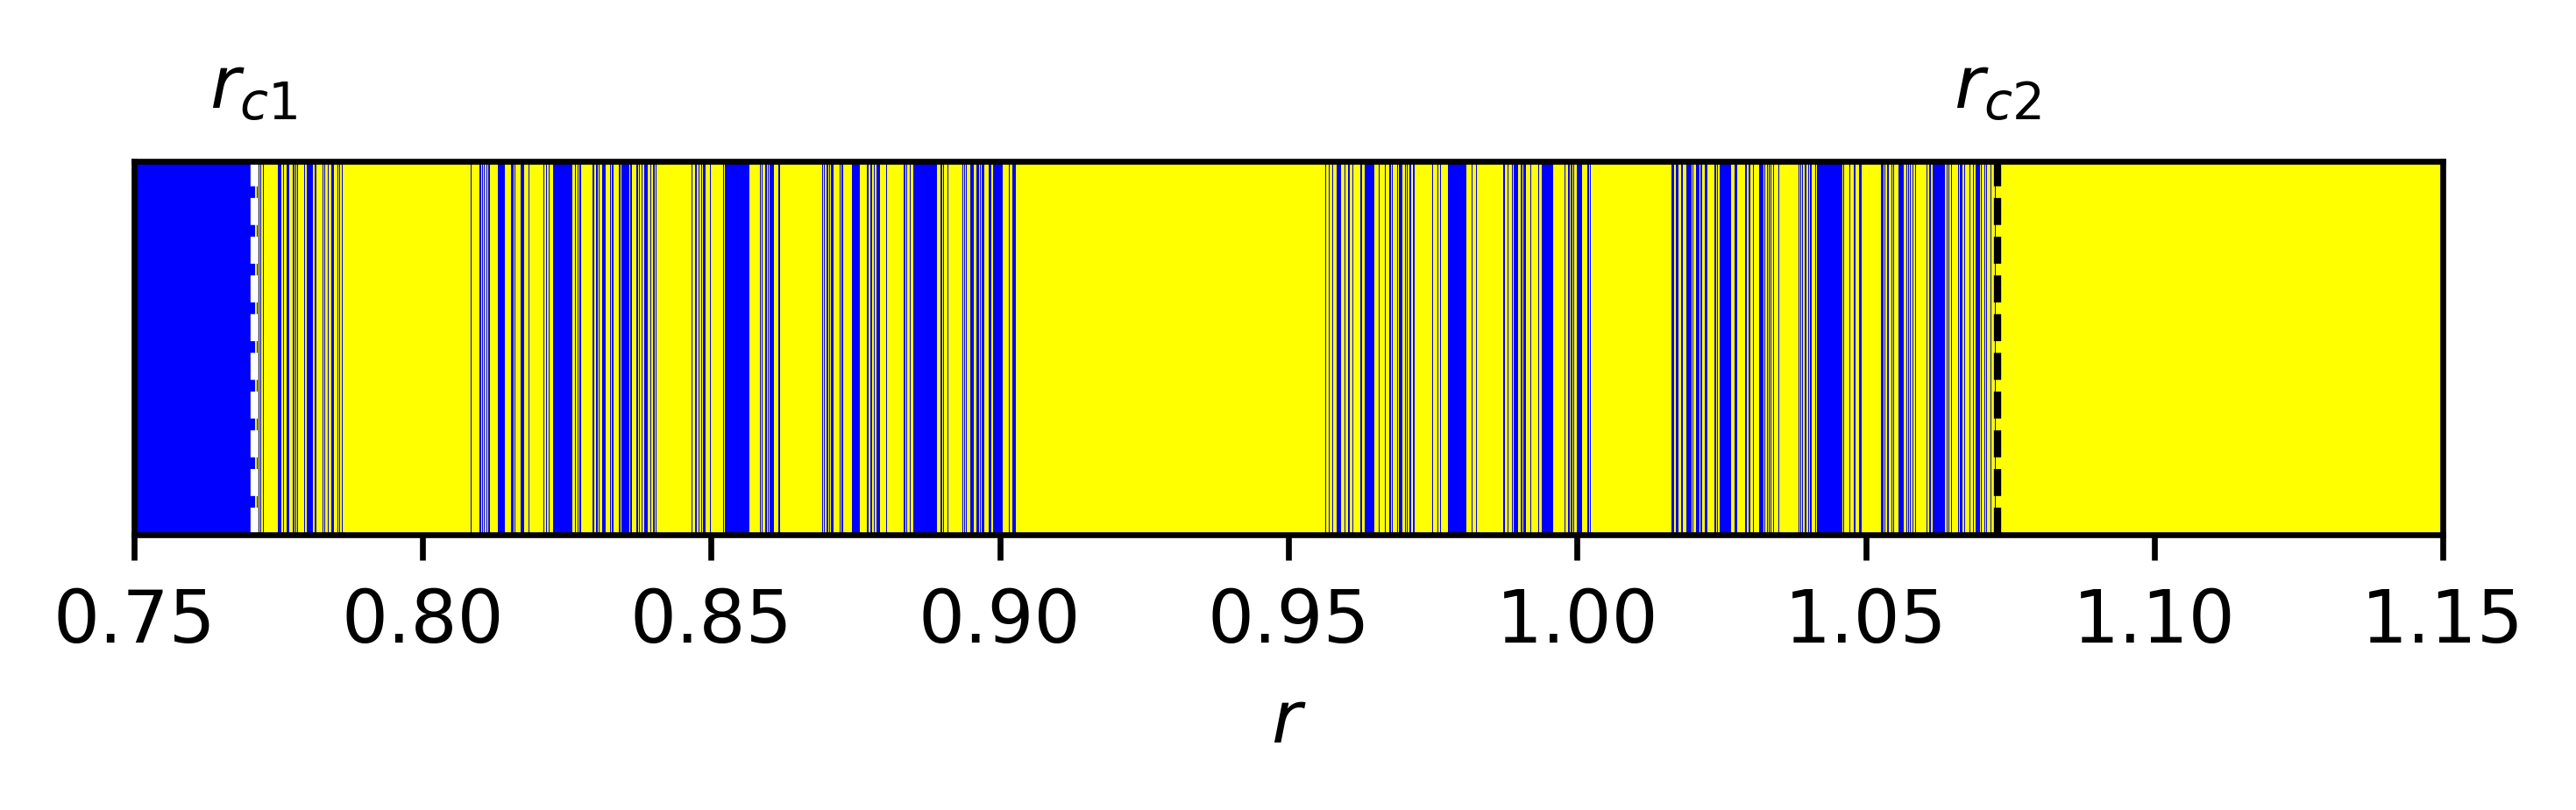

r_c1 = 0.7707620762076207      r_c2 = 1.0728322832283228


In [11]:
rate1, rate2 = 0.75, 1.15
slope = 2
s_ini = -12

_, attractor = modified_tent_intersections(u=3, d = 0)

visualise_third_fractal_parallel(rate_lower_bound=rate1, rate_upper_bound=rate2, func = modified_tent, 
                          u=3, slope = slope, s_ini = s_ini, npts = 10000, xmin_escape = -slope, 
                          evolving_funcs = [tanh_change], evolving_params = ['d'],
                          converging_condition = converging_condition_pullback, x_thres = attractor, mark_rcs=True)



## Computing the fractal dimension

Running uncertainty_algorithm_for_rate in parallel (n_jobs=-1, prefer=processes)...


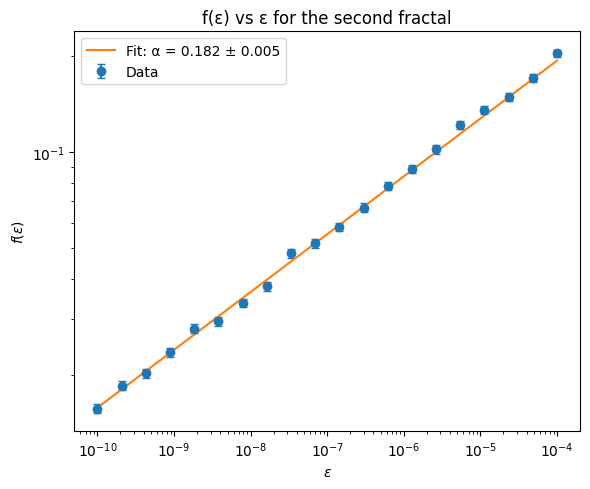

The dimension of fractal 3 is 0.818


In [12]:
slope = 2
u = 3
_, attractor = modified_tent_intersections(u = u, d = 0)

dim = 1-uncertainty_algorithm_for_rate_parallel(func = modified_tent, slope = slope, s_ini = -10, u = u, threshold = 1000, evolving_funcs = [tanh_change], evolving_params = ['d'],
                                    min_eps=1e-10, max_eps=1e-4, fit_truncation_order = -6, plot = True, rate_upper_bound = 3, xmin_escape = -slope,
                                    converging_condition = converging_condition_pullback, x_thres = attractor)

print(f'The dimension of fractal 3 is {dim:.3f}')

# The combined fit
Reproducing Fig. 2(b)

Running uncertainty_algorithm_in parallel (n_jobs=-1, prefer=processes)...
Running uncertainty_algorithm_for_delta_d in parallel (n_jobs=-1, prefer=processes)...
Running uncertainty_algorithm_for_rate in parallel (n_jobs=-1, prefer=processes)...


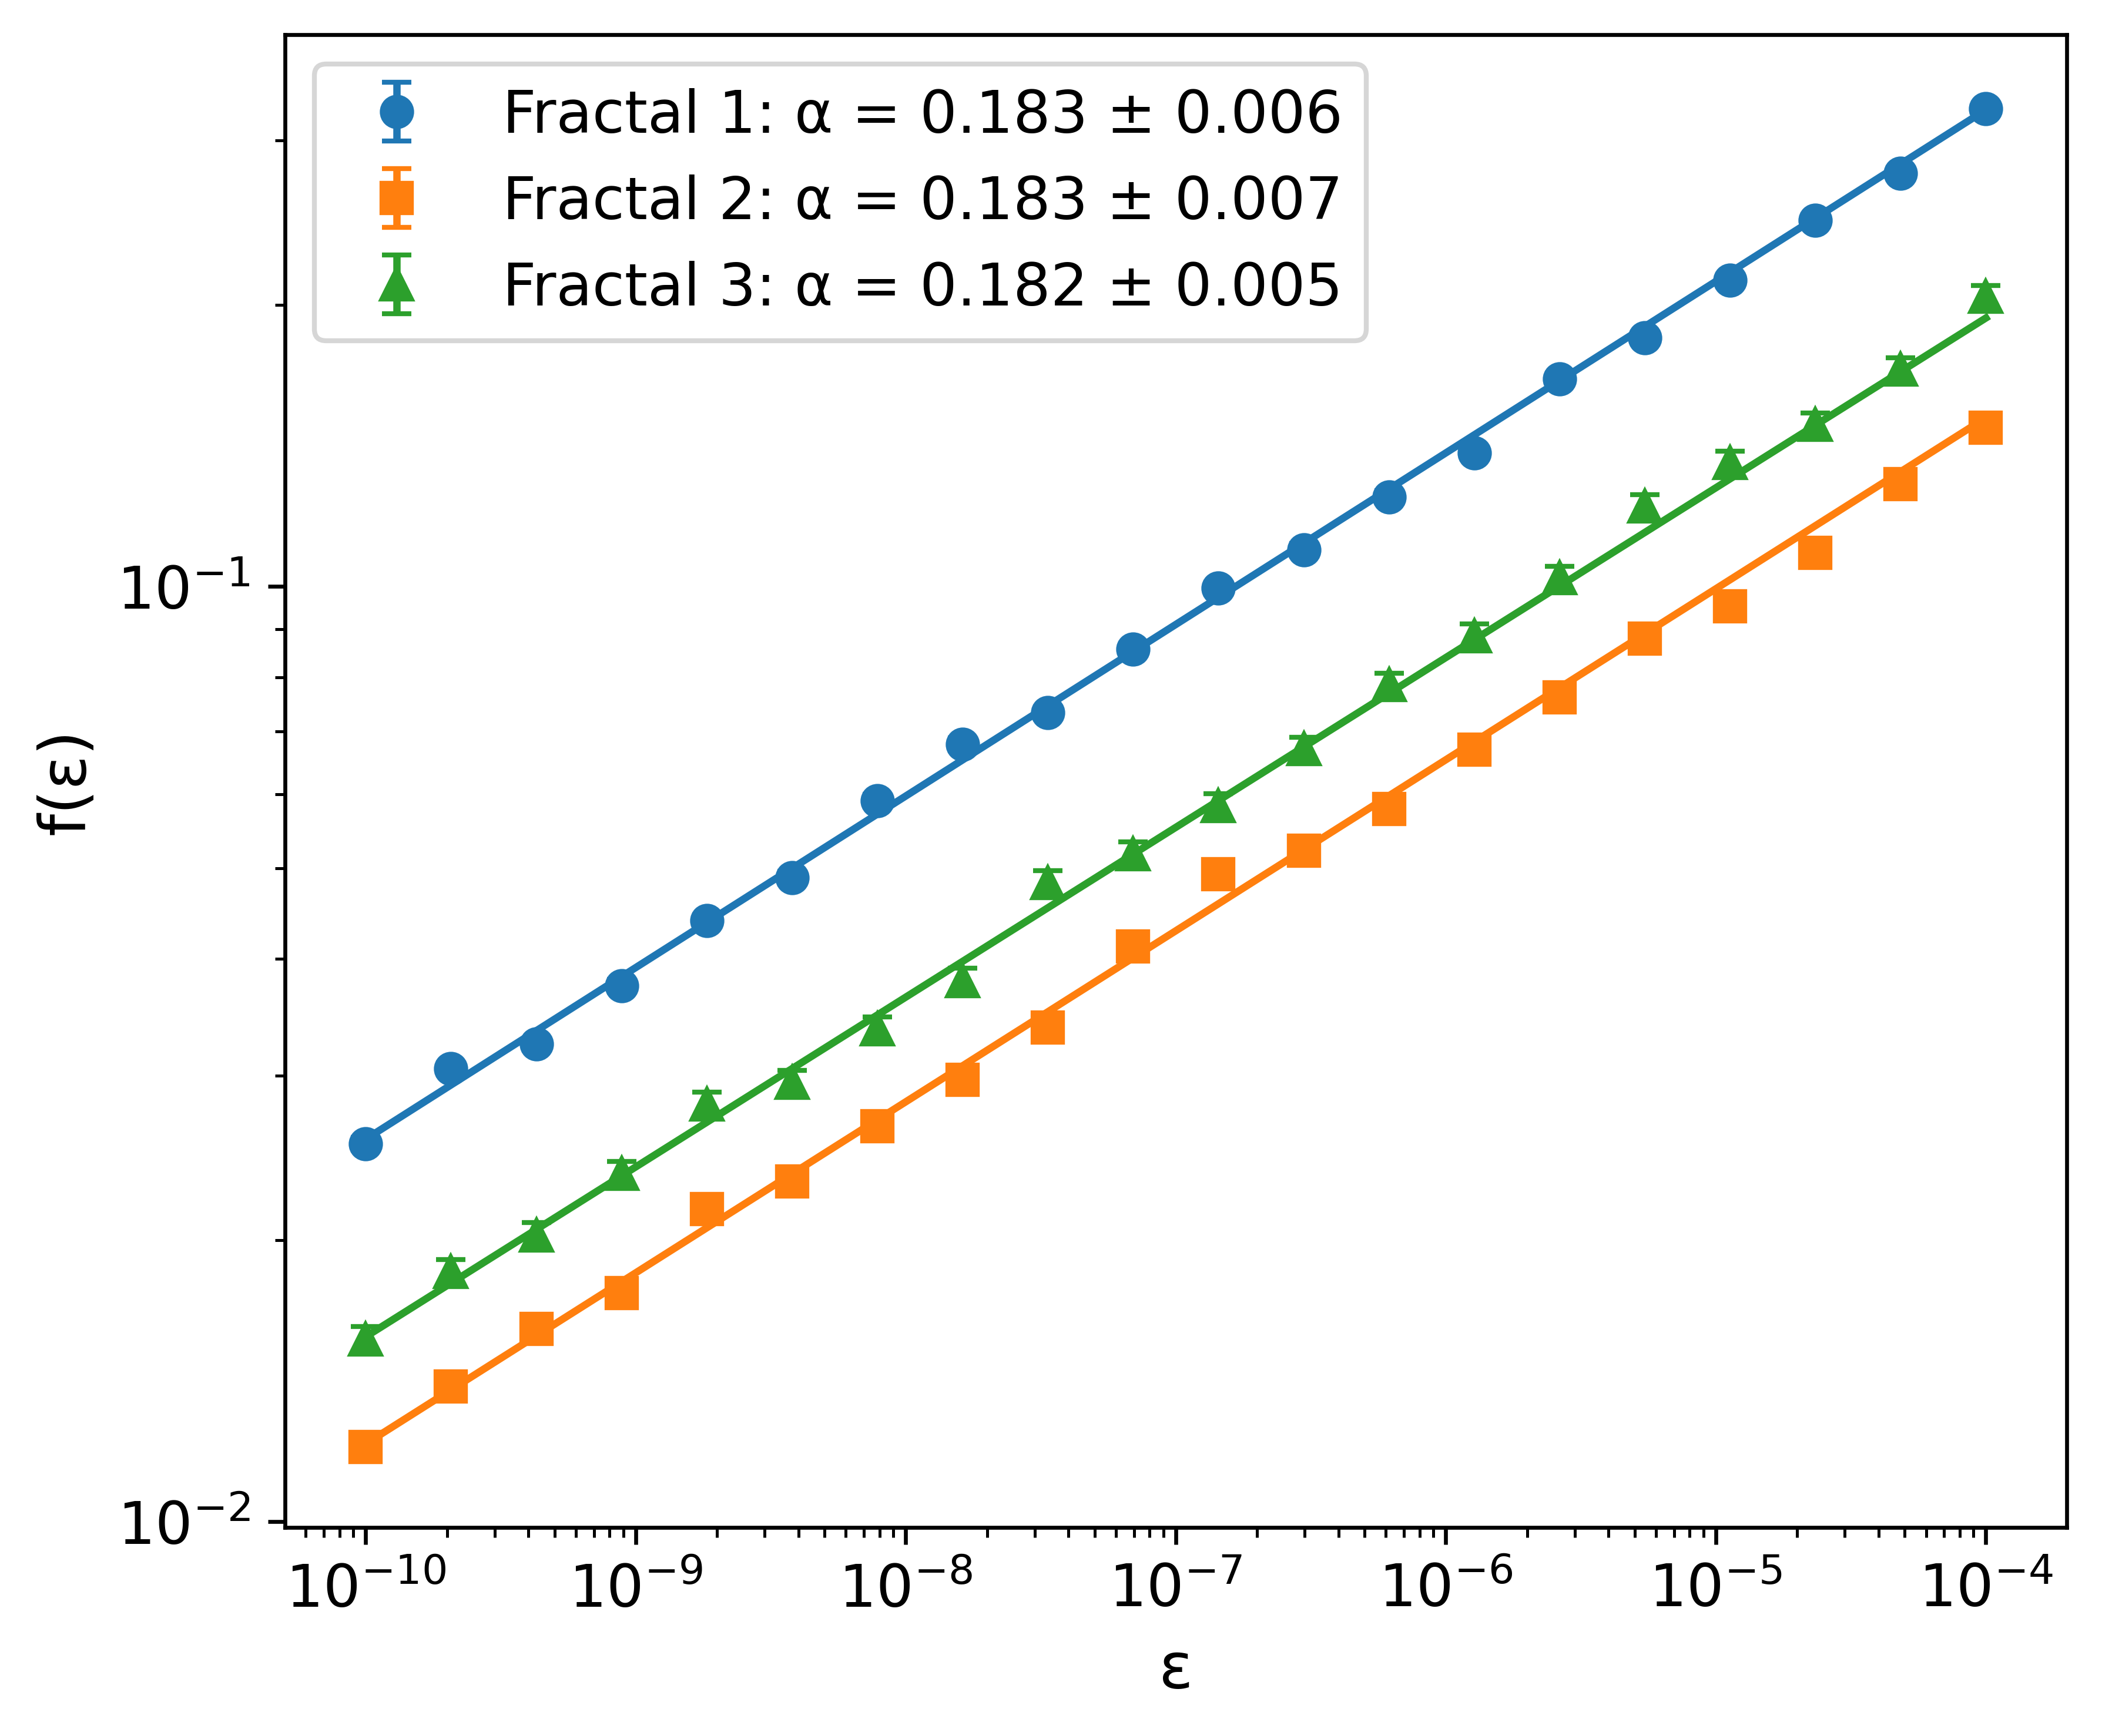

In [13]:
colors = ["tab:blue", "tab:orange", "tab:green"]   # or any colors you prefer
fontsize = 12

plt.figure(figsize=(6, 5), dpi=600)

# ------------------ FRACTAL 1 ------------------
col = colors[0]

u = 3
d = 0
threshold = 1000

_, attractor = modified_tent_intersections(u=u, d=d)
epsilons, feps, feps_err, fit_line, slope, confid_int = uncertainty_algorithm_parallel(threshold=threshold, func = modified_tent, u=u, d=d, plot = False, xmin_escape = 0,
                                                                                    max_steps = 100, attractors = [attractor], base_seed=0, return_all_info=True)

plt.errorbar(
    epsilons, 2 * feps,
    yerr=feps_err,
    fmt='o', capsize=3,
    color=col, ecolor=col,
    label=f'Fractal 1: α = {slope:.3f} ± {confid_int:.3f}'
)
plt.loglog(epsilons, 2 * fit_line, color=col)

# ------------------ FRACTAL 2 ------------------
col = colors[1]

right_reinject, attractor = modified_tent_intersections(u=3, d=0)
dmin, dmax = attractor - right_reinject, attractor

epsilons, feps, feps_err, fit_line, slope, confid_int = uncertainty_algorithm_for_delta_d_parallel(func=modified_tent, u = u, threshold = threshold, min_eps=1e-10, max_eps=1e-4, 
                                                base_seed=0, n_jobs=-1, fit_truncation_order = -6, plot = False, dmin=dmin, dmax=dmax, evolving_params = ['d'], xmin_escape = 0,
                                                return_all_info = True)


plt.errorbar(
    epsilons, feps,
    yerr=feps_err,
    fmt='s', capsize=3,
    color=col, ecolor=col,
    label=f'Fractal 2: α = {slope:.3f} ± {confid_int:.3f}'
)
plt.loglog(epsilons, fit_line, color=col)

# ------------------ FRACTAL 3 ------------------
col = colors[2]

slope = 2
_, attractor = modified_tent_intersections(u = u, d = 0)

epsilons, feps, feps_err, fit_line, slope, confid_int = uncertainty_algorithm_for_rate_parallel(func = modified_tent, slope = slope, s_ini = -10, u = u, 
                                    threshold = threshold, evolving_funcs = [tanh_change], evolving_params = ['d'], return_all_info = True,
                                    min_eps=1e-10, max_eps=1e-4, fit_truncation_order = -6, plot = False, rate_upper_bound = 3, xmin_escape = -slope,
                                    converging_condition = converging_condition_pullback, x_thres = attractor)

plt.errorbar(
    epsilons, feps,
    yerr=feps_err,
    fmt='^', capsize=3,
    color=col, ecolor=col,
    label=f'Fractal 3: α = {slope:.3f} ± {confid_int:.3f}'
)
plt.loglog(epsilons, fit_line, color=col)

# ------------------ Formatting ------------------
plt.xlabel('ε', fontsize=fontsize+1)
plt.ylabel('f(ε)', fontsize=fontsize+1)
plt.legend(fontsize=fontsize)
plt.tight_layout()
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.show()


# Reporoducing Fig. 3

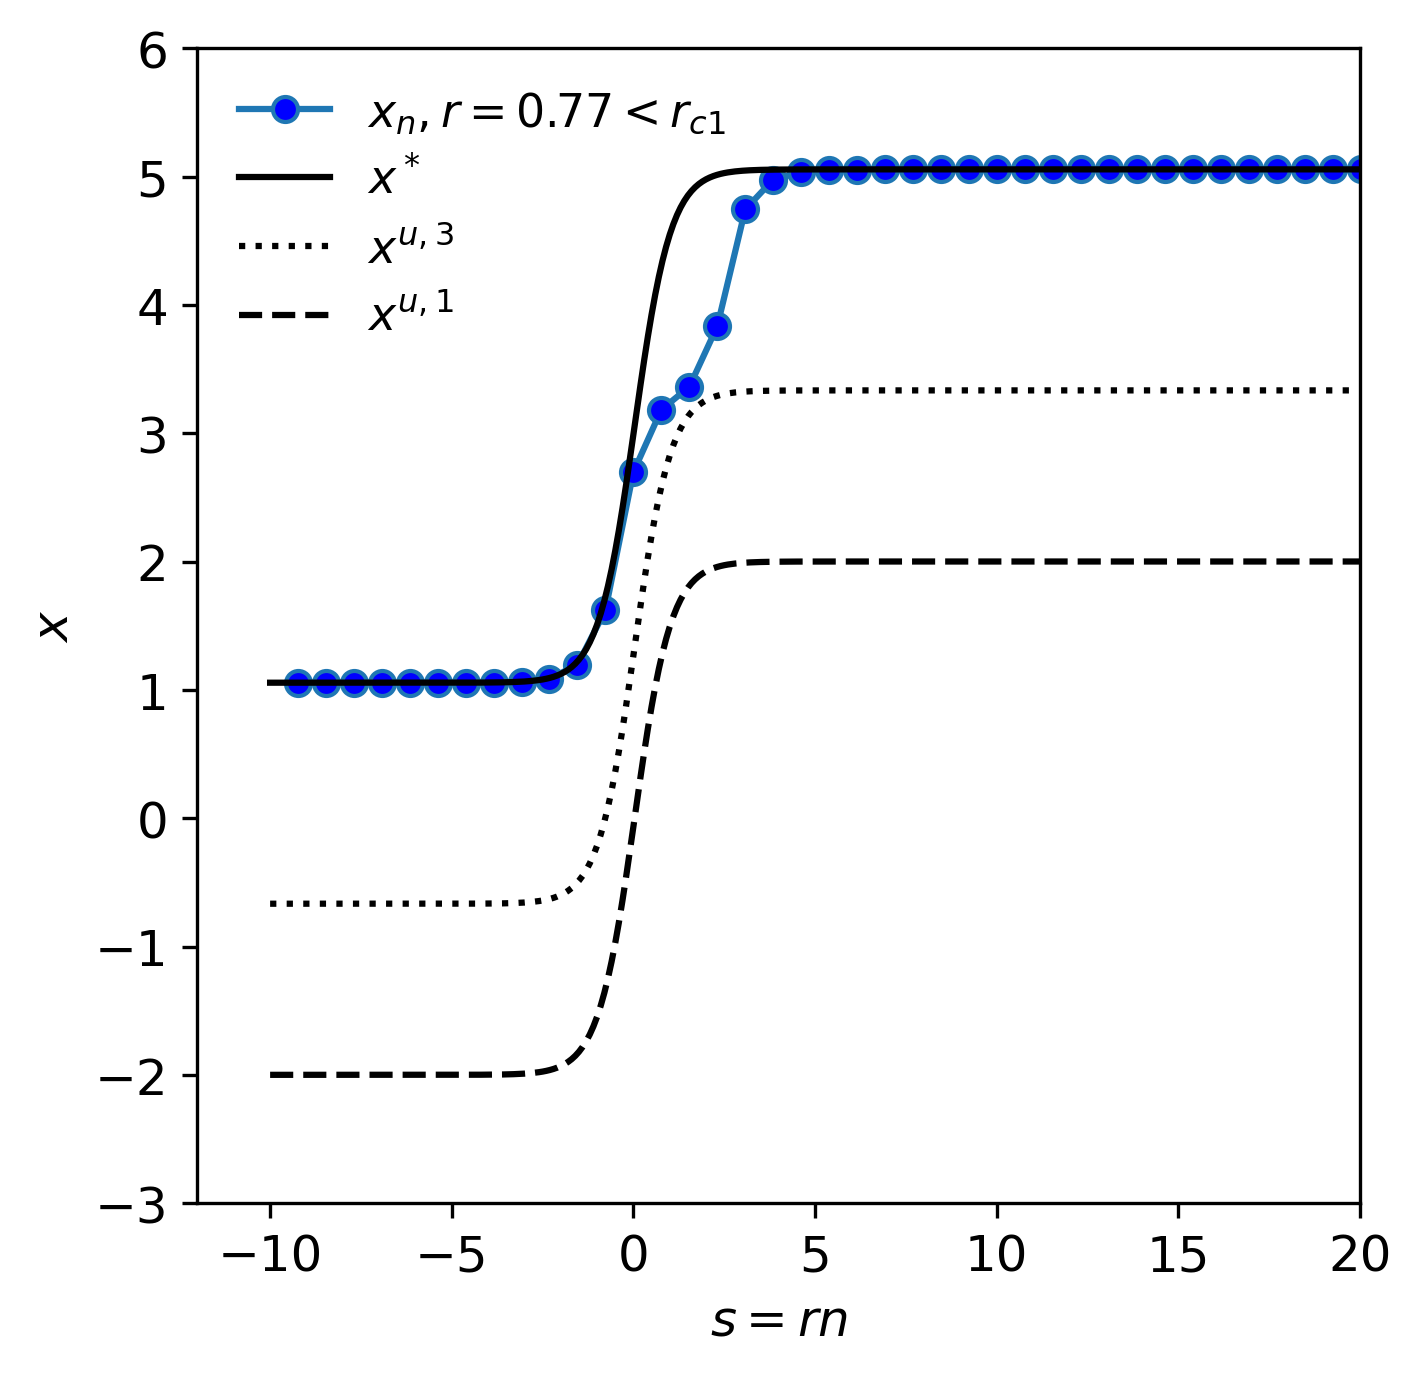

In [14]:
rate = 0.77
slope = 2
s_ini = -10
plot_tipping_modified_tent(rates = [rate], u=3, slope = slope, s_ini = s_ini, mode = 2, evolving_range=40, plot_reinjection=True, plot_tent=True, evolving_funcs = [tanh_change],
                           evolving_params = ['d'], xmin_escape = -slope)

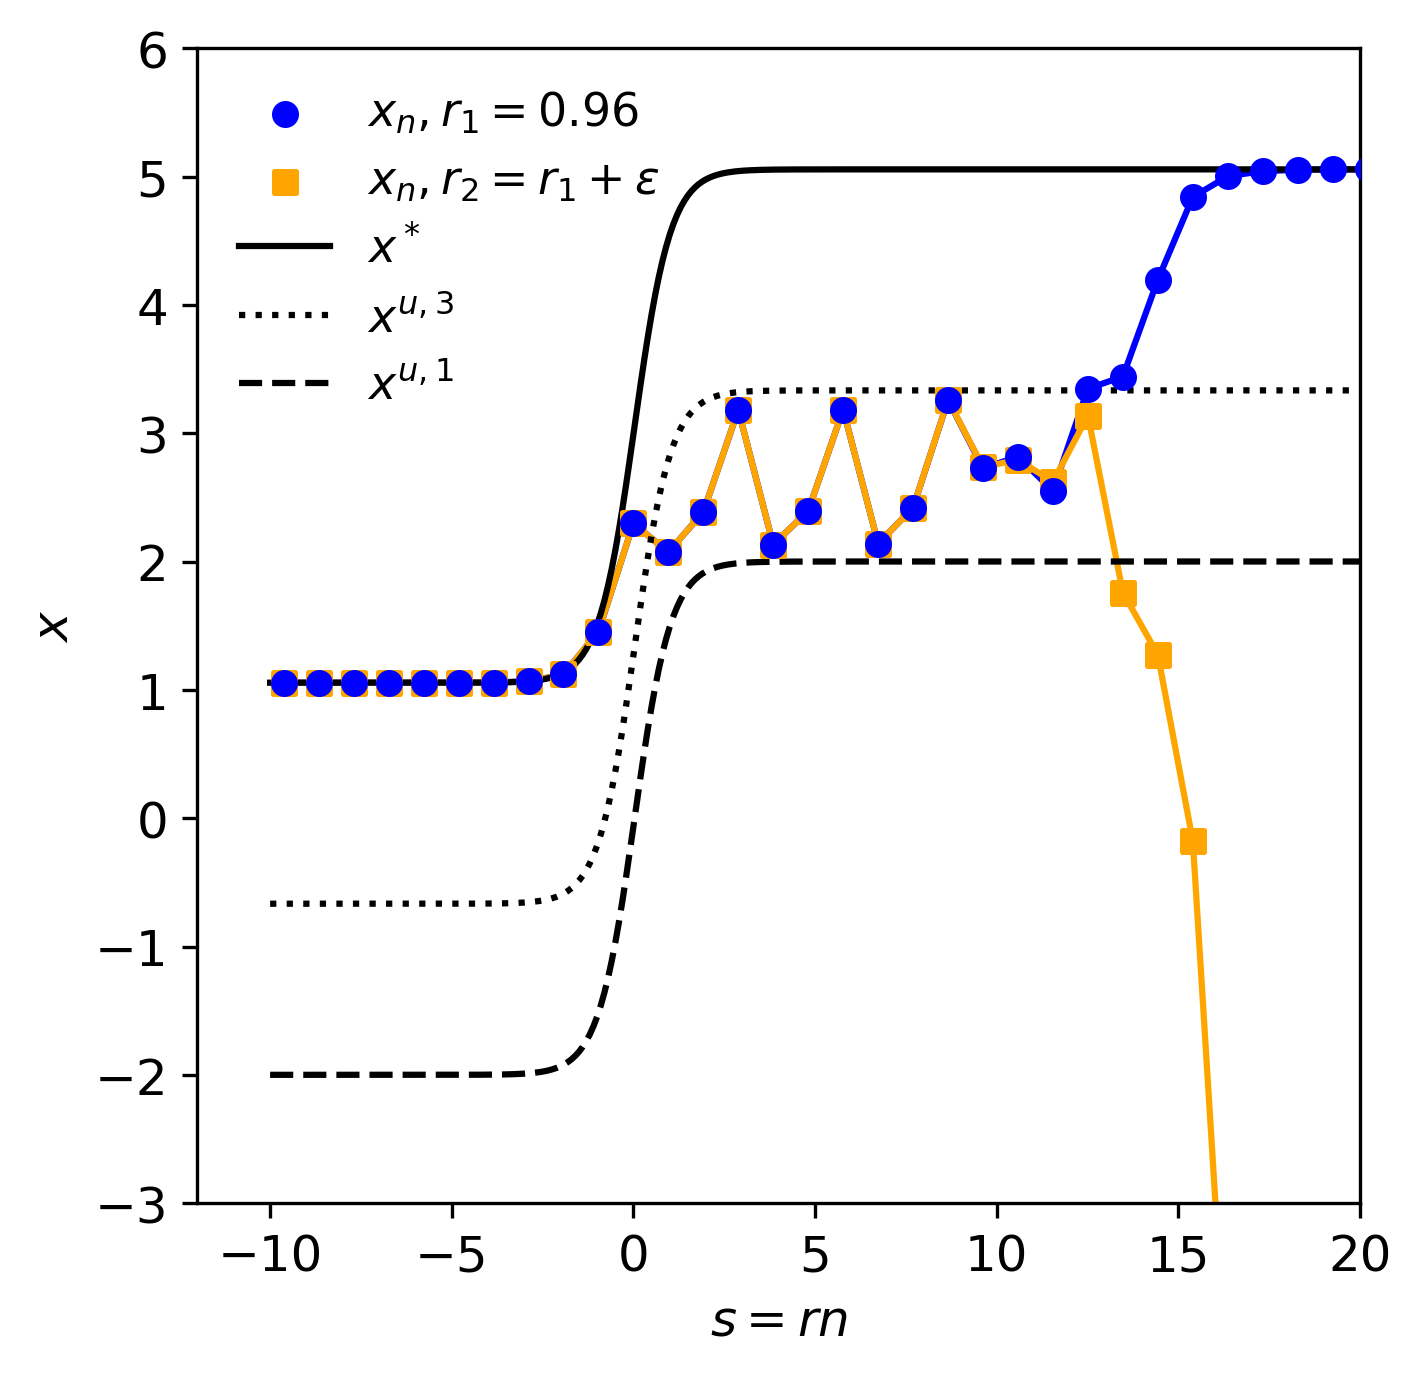

In [15]:
# 0.9624352875369018
rate = 0.96243528753
slope = 2
s_ini = -10
plot_tipping_modified_tent(rates = [rate, rate + 1e-9], u=3, slope = slope, s_ini = s_ini, mode = 1, evolving_range=40, plot_reinjection=True, plot_tent=True, evolving_funcs = [tanh_change],
                           evolving_params = ['d'], xmin_escape = -slope)

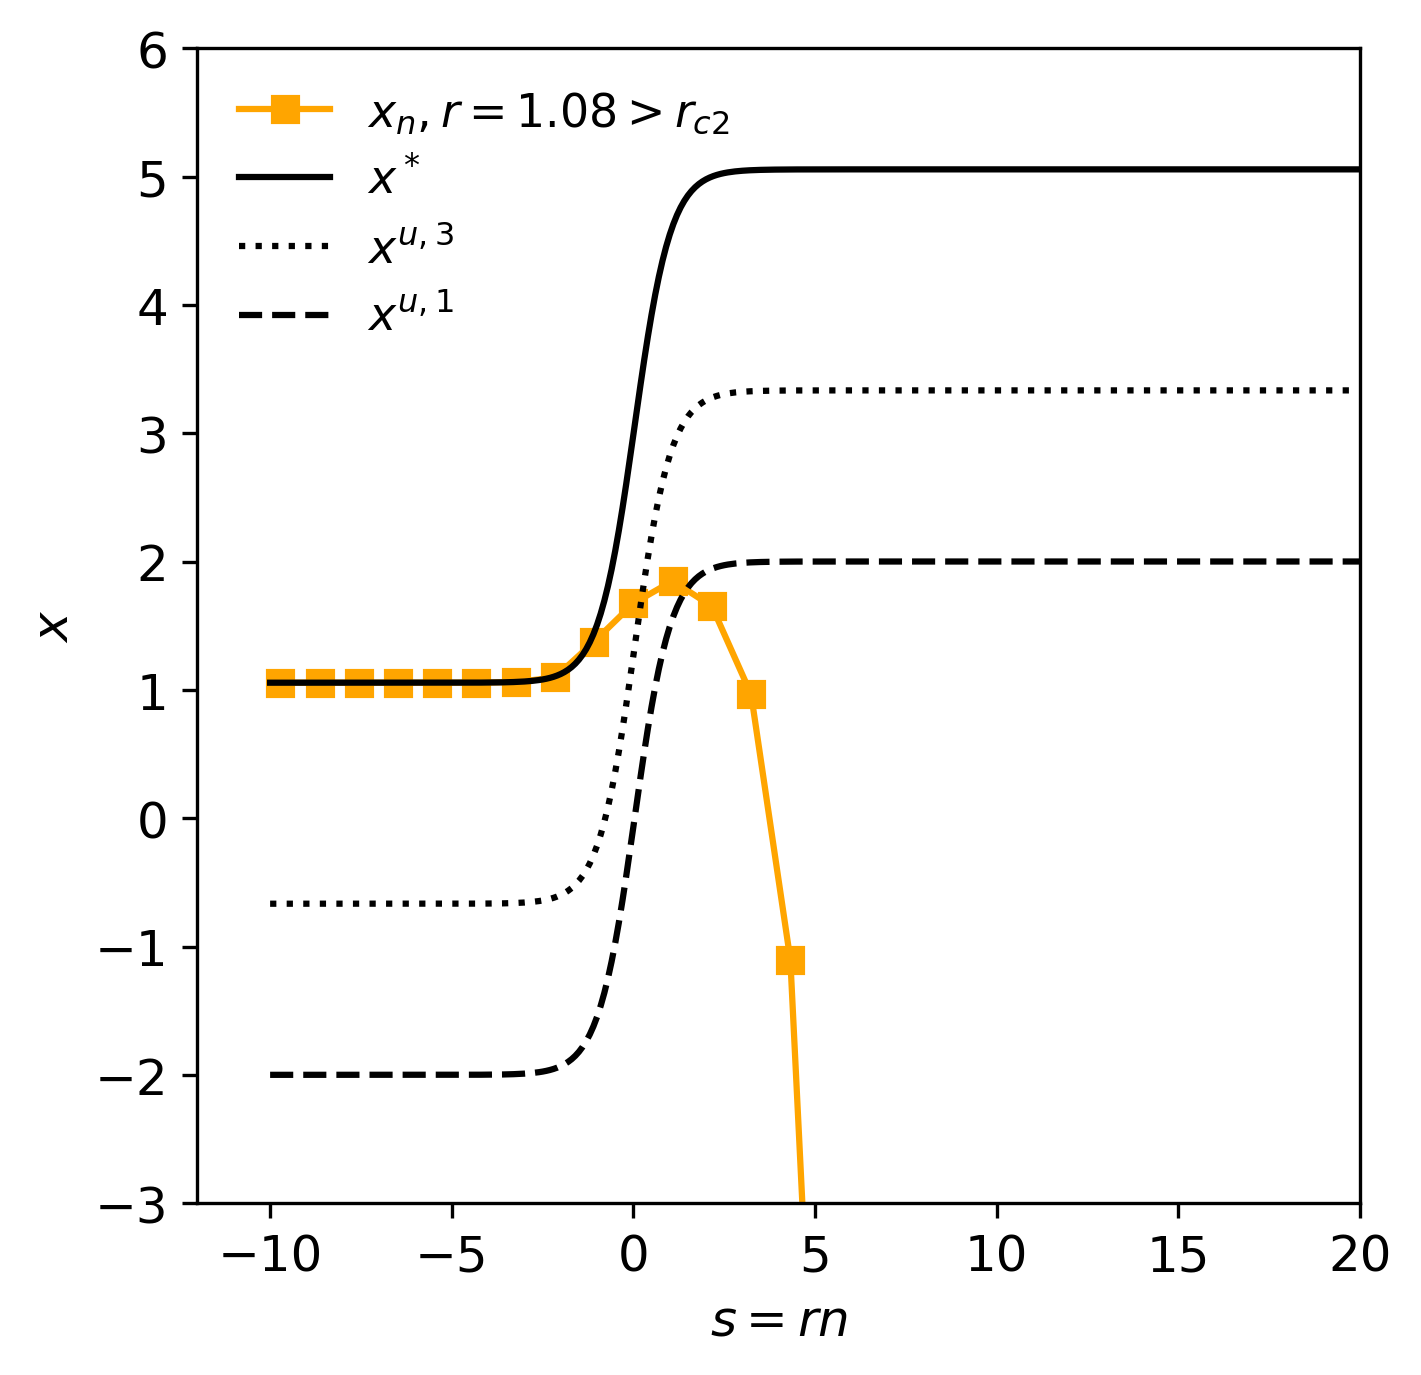

In [16]:
rate = 1.08
slope = 2
s_ini = -10
mode = 3
plot_tipping_modified_tent(rates = [rate], u=3, slope = slope, s_ini = s_ini, mode = mode, evolving_range=40, plot_reinjection=True, plot_tent=True, evolving_funcs = [tanh_change],
                           evolving_params = ['d'], xmin_escape = -slope)